<a href="https://colab.research.google.com/github/adityamhamunkar/imagefinetuning/blob/main/SDXL_LoRA_DreamBooth_GreenChair.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Inference Notebook - SDXL DreamBooth Fine-Tuned on Old Book Illustrations
## Click Video Below for Training Guide & Walkthrough

<a href="https://youtu.be/v89kB4OScOA">
  <img src="https://i.imgur.com/fW6hHu2.png" width="350">
</a>

---

Loading and Running DreamBooth LoRA Adapters for Stable Diffusion XL Base 1.0, trained on some pictures of my green chair.

**LoRA Adapters** - [AdamLucek/sdxl-base-1.0-greenchair-dreambooth-lora](https://huggingface.co/AdamLucek/sdxl-base-1.0-greenchair-dreambooth-lora)

**Training Dataset** - [AdamLucek/green-chair](https://huggingface.co/datasets/AdamLucek/green-chair)

## Example Output
<img src="https://cdn-uploads.huggingface.co/production/uploads/65ba68a15d2ef0a4b2c892b4/tTVfzzi4H09-H8w4dAyA3.jpeg" width="500">

---

## Install Dependencies & Packages

In [1]:
%%capture
!pip install -U peft transformers diffusers

## Diffusers Pipeline Setup

Loading [Stable Diffusion XL Base 1.0](https://huggingface.co/stabilityai/stable-diffusion-xl-base-1.0) as the base model then attaching LoRA adapters.

In [4]:
from diffusers import DiffusionPipeline
import torch

# Load Stable Diffusion XL Base1.0
pipe = DiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0",
    torch_dtype=torch.float16,
    variant="fp16",
    use_safetensors=True
).to("cuda")

# Optional CPU offloading to save some GPU Memory
pipe.enable_model_cpu_offload()

# Loading Trained DreamBooth LoRA Weights
pipe.load_lora_weights("AdamLucek/sdxl-base-1.0-greenchair-dreambooth-lora")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/609 [00:00<?, ?B/s]

Fetching 19 files:   0%|          | 0/19 [00:00<?, ?it/s]

scheduler_config.json:   0%|          | 0.00/479 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

text_encoder/model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

text_encoder_2/model.fp16.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

unet/diffusion_pytorch_model.fp16.safete(…):   0%|          | 0.00/5.14G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

vae/diffusion_pytorch_model.fp16.safeten(…):   0%|          | 0.00/167M [00:00<?, ?B/s]

vae_1_0/diffusion_pytorch_model.fp16.saf(…):   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

pytorch_lora_weights.safetensors:   0%|          | 0.00/29.9M [00:00<?, ?B/s]

In [7]:
identifier = "a photo of sks chair"
prompt = f"{identifier} on top of mount everest"

# Invoke pipeline to generate image
image = pipe(
    prompt = prompt,
    num_inference_steps=50,
    height=1024,
    width=1024,
    # guidance_scale=7.0,
).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

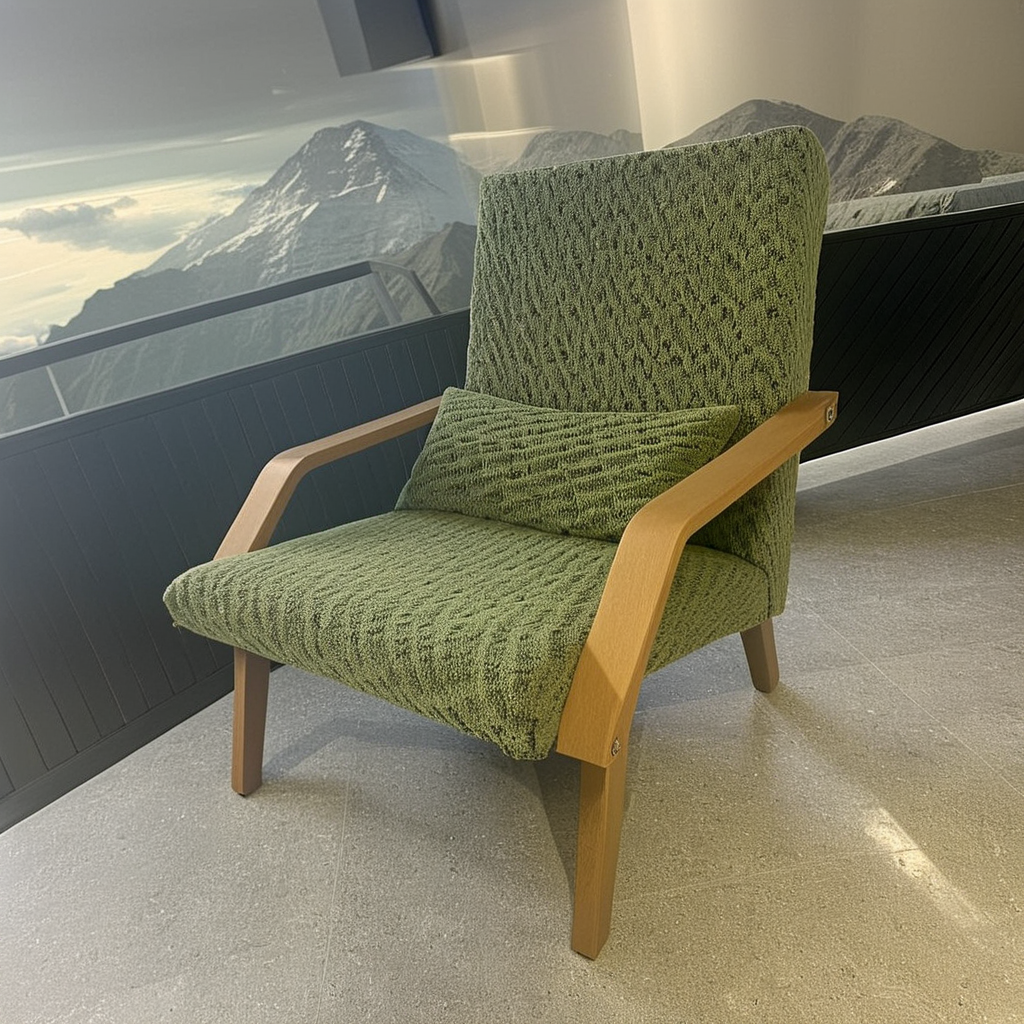

In [8]:
# Display image
image

In [ ]:
# Save Image
image.save(f"sdxl_greenchair_{prompt}.png")